<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
data=keras.datasets.mnist

In [2]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

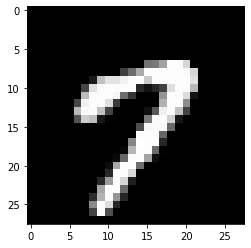

In [4]:
x_train=x_train/255.0
x_test=x_test/255.0
plt.imshow(x_train[20],cmap="gray")
plt.show()

In [10]:
from keras.models import Sequential,Model,Input

In [7]:
from keras.layers import Activation, Dense, Flatten,Dropout,Reshape
from keras.layers import LeakyReLU as LR

In [8]:
LATENT_SIZE = 32
encoder=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512),
    LR(),
    Dropout(0.2),
    Dense(256),
    LR(),
    Dropout(0.2),
    Dense(128),
    LR(),
    Dropout(0.2),
    Dense(64),
    LR(),
    Dropout(0.2),
    Dense(LATENT_SIZE,activation="sigmoid"),
])

In [9]:
decoder=Sequential([
    Dense(64,input_shape=(LATENT_SIZE,)),
    LR(),
    Dropout(0.2),
    Dense(128),
    LR(),
    Dropout(0.2),
    Dense(256),
    LR(),
    Dropout(0.2),
    Dense(512),
    LR(),
    Dropout(0.2),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28,28))
])

In [11]:
img=Input(shape=(28,28))
latent_vector=encoder(img)
output=decoder(latent_vector)
model=Model(inputs=img,outputs=output)
model.compile("adam",loss="binary_crossentropy")

In [13]:
model.fit(x_train,x_train,batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1728
Epoch 2/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1608
Epoch 3/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1554
Epoch 4/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1522
Epoch 5/10
938/938 [==============================] - 21s 23ms/step - loss: 0.1499
Epoch 6/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1480
Epoch 7/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1464
Epoch 8/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1453
Epoch 9/10
938/938 [==============================] - 22s 23ms/step - loss: 0.1442
Epoch 10/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1432
